<a href="https://colab.research.google.com/github/BenBlondeel-UCLL/Troy-ML/blob/master/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

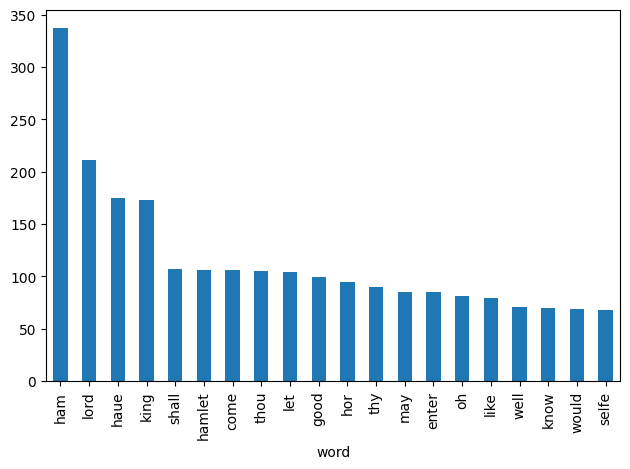

<ipython-input-28-3c0b98f2620d>:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


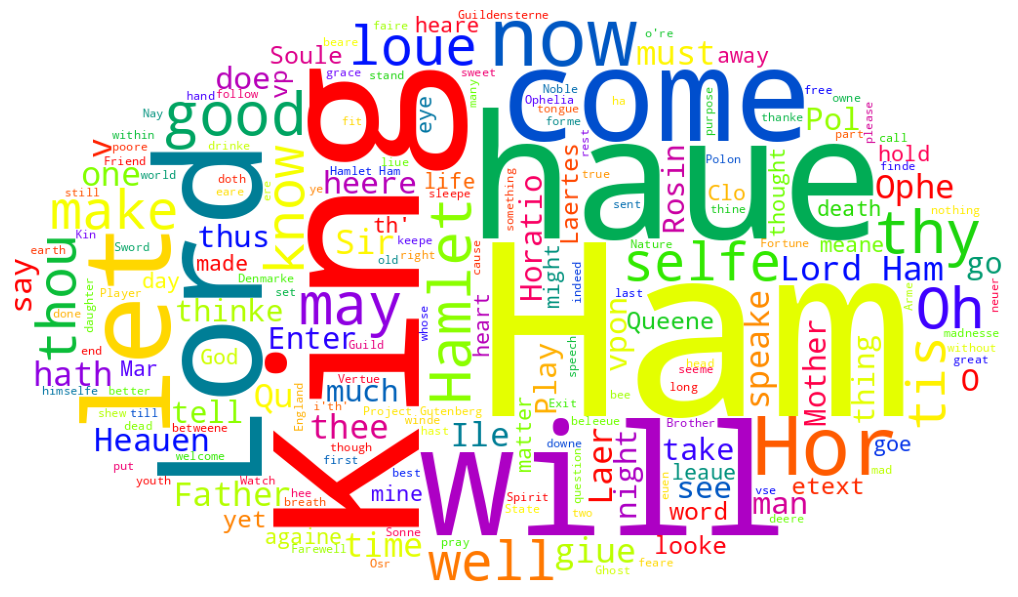

In [28]:
import requests
from textblob import TextBlob
from nltk.corpus import stopwords
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
import imageio
from wordcloud import WordCloud

# Download the text of Hamlet
target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
blob = TextBlob(response.text)

# Create list of word frequencies
items = blob.word_counts.items()

# Filter out the stopwords
stop_words = stopwords.words('english')
items = [item for item in items if item[0] not in stop_words]

# Sorting the word fequency list
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

# Get the top 20
top20 = sorted_items[:20]

# Creating the datframe
df = pd.DataFrame(top20, columns=['word', 'count'])

# Visualizing the dataframe
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()
plt.show()

# Download wordcloud mask
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

# Create a wordcloud object
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')
wordcloud = wordcloud.generate(response.text)
plt.figure(figsize=(30,7.5))
plt.axis('off')
plt.imshow(wordcloud)